In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

In [2]:
# 1) Veri setini yükle
cal = fetch_california_housing(as_frame=True)
X = cal.frame.drop(columns=["MedHouseVal"])
y = cal.frame["MedHouseVal"]

In [3]:
# 2) Train/Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# 3) Modeli tanımla
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [5]:
# 4) Eğit
model.fit(X_train, y_train)

c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AhmetD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
              random_state=42, subsample=0.8)

In [6]:
# 5) Tahmin ve değerlendirme
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # sürümler arası uyum için karekök
r2 = r2_score(y_test, y_pred)

print(f"LightGBM RMSE: {rmse:.4f}")
print(f"LightGBM R2  : {r2:.4f}")

LightGBM RMSE: 0.4393
LightGBM R2  : 0.8527


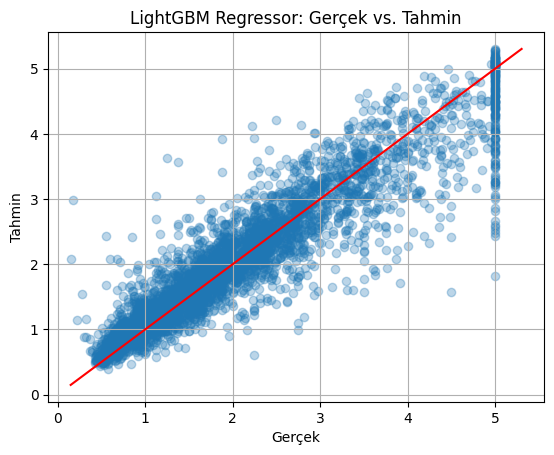

In [7]:
# 6) Gerçek vs. tahmin grafiği
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], color="red")  # referans doğrusu
plt.xlabel("Gerçek")
plt.ylabel("Tahmin")
plt.title("LightGBM Regressor: Gerçek vs. Tahmin")
plt.grid(True)
plt.show()